[Kaggle - Confusion Matrix](https://www.kaggle.com/agungor2/various-confusion-matrix-plots)

In a typical supervised learning problem setting, confusion matrix is used to layout the performance of an algorithm. By looking at the confusion matrix, we can understand how well the algorithm works for specific class of choosing. It's commonly used to describe the performance of a classification model. I wanted to create a quick reference guide and include various different libraries to plot confusion matrix so that you can use any one of them in your workload.

There are many more methods to visualize confusion matrix. If you have a favorite one that you would like to see in this notebook, feel free to **leave comment** and I'll add them, too. 

## Table of Content:
[1. Seaborn Heatmap ](#first-bullet)

[2. Seaborn Heatmap More Analysis](#second-bullet)

[3. Interactive Plotting with Pygal ](#third-bullet)

[4. Interactive Plotting with Altair](#fourth-bullet)

[5. Pandas Confusion Matrix](#fifth-bullet)

[6. Scikit-plot Confusion Matrix](#sixth-bullet)

## 1. Seaborn Heatmap <a class="anchor" id="first-bullet"></a>

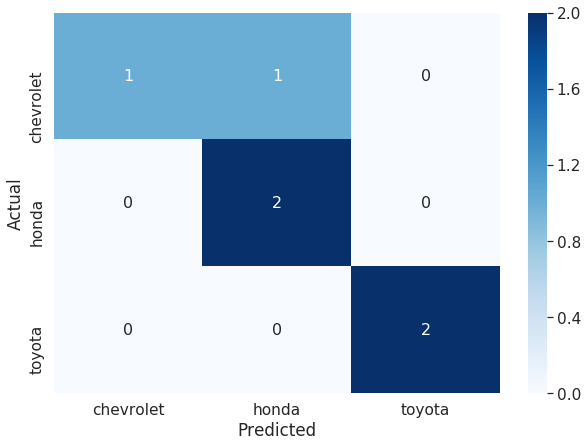

In [1]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

y_true = ["honda", "chevrolet", "honda", "toyota", "toyota", "chevrolet"]
y_pred = ["honda", "chevrolet", "honda", "toyota", "toyota", "honda"]
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

## 2. Seaborn Heatmap More Analysis <a class="anchor" id="second-bullet"></a>


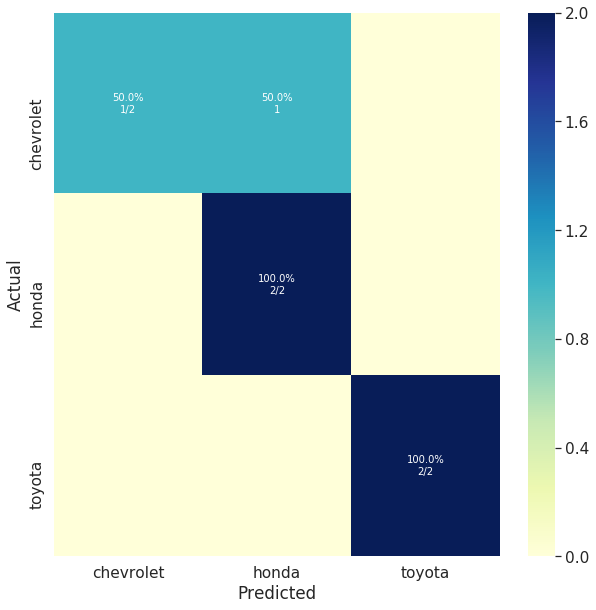

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(y_true, y_pred)

 ## 3. Interactive Plotting with Pygal <a class="anchor" id="third-bullet"></a>

Dependecies : pip install pygal

In [3]:
! pip -q install pygal

In [4]:
import pygal
from IPython.display import display, HTML
from pygal.style import RedBlueStyle

base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))
def plot_cm(y_true, y_pred):
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    dot_chart = pygal.Dot(x_label_rotation=30, interpolate='cubic', style=RedBlueStyle)
    dot_chart.title = 'Confusion Matrix'
    dot_chart.x_labels = labels
    dot_chart.x_title = "Predicted"
    dot_chart.y_title = "Actual"
    for i in range(len(labels)):
        dot_chart.add(labels[i], cm[i,:])
    galplot(dot_chart)
    
plot_cm(y_true, y_pred)

## 4. Interactive Plotting with Altair <a class="anchor" id="fourth-bullet"></a>

Dependecies : pip install -U altair notebook vega

fork it and run it by yourself to see the plot

In [5]:
! pip install -q -U altair notebook vega

In [6]:
from itertools import product
import altair as alt
alt.renderers.enable('notebook')

labels = np.unique(y_true)
cm = confusion_matrix(y_true, y_pred, labels=labels)
cm = [y for i in cm for y in i]
roll = list(product(np.unique(y_true), repeat = 2))
columns = ["actual", "predicted", "confusion_matrix"]
df = pd.DataFrame(columns=columns)
for i in range(len(roll)):
    df = df.append({'actual':roll[i][0], 'predicted':roll[i][1], 'confusion_matrix':cm[i]}, ignore_index=True)
#plot figure
def make_example(selector):
    return alt.Chart(df).mark_rect().encode(
        x="predicted:N",
        y="actual:N",
        color=alt.condition(selector, 'confusion_matrix', alt.value('lightgray'))
    ).properties(
        width=600,
        height=480
    ).add_selection(
        selector
    )
interval_x = alt.selection_interval(encodings=['x'], empty='none')
make_example(interval_x)

## 5. Pandas Confusion Matrix <a class="anchor" id="fifth-bullet"></a>

Dependencies: pip install pandas-ml

In [7]:
! pip install -q pandas-ml

Using TensorFlow backend.


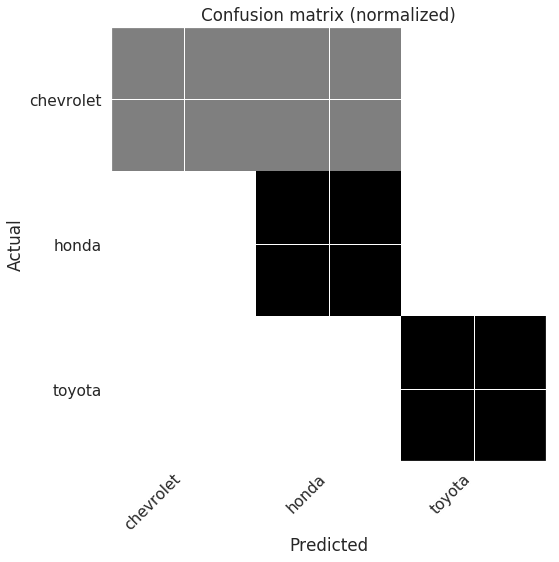

In [8]:
%matplotlib inline
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_true, y_pred)
confusion_matrix.plot(normalized=True)

## 6. Scikit-plot Confusion Matrix <a class="anchor" id="sixth-bullet"></a>

Dependencies: pip install scikit-plot

In [9]:
! pip install -q scikit-plot

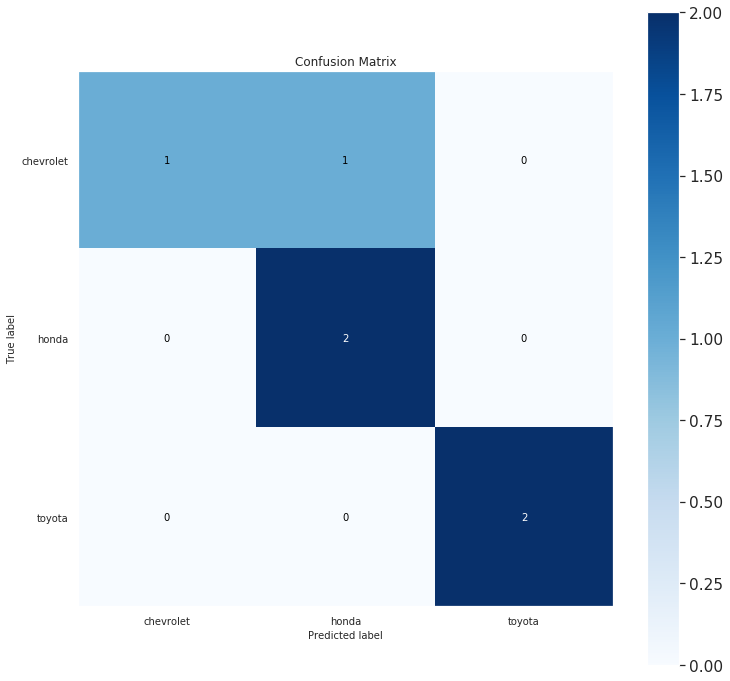

In [10]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred,
    figsize=(12,12))

If you like this notebook, please feel free to **UPVOTE**! **Leave Comment** for your suggestions so we can create one big confusion matrix visualization guide together.  

Stay Tuned for More!